-----iteration--- 0


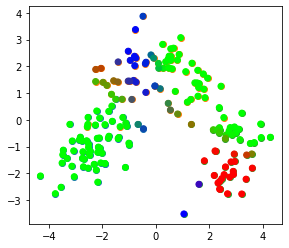

-----iteration--- 1


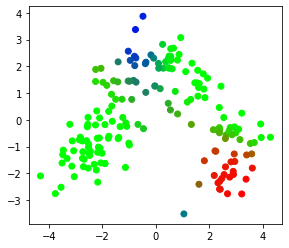

-----iteration--- 2


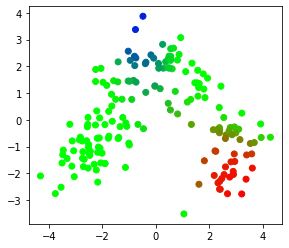

-----iteration--- 3


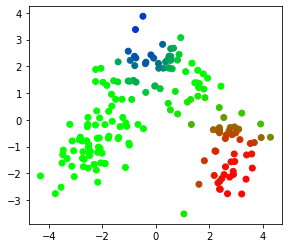

-----iteration--- 4


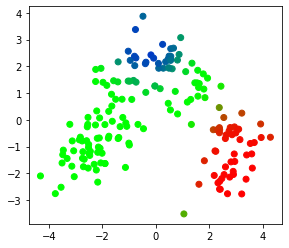

-----iteration--- 5


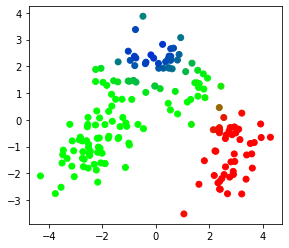

-----iteration--- 6


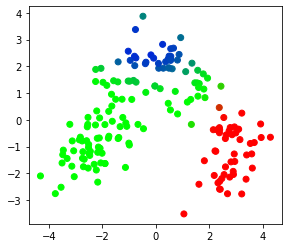

-----iteration--- 7


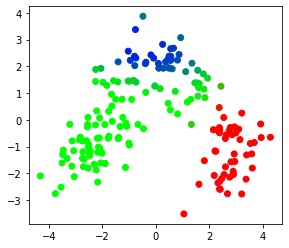

-----iteration--- 8


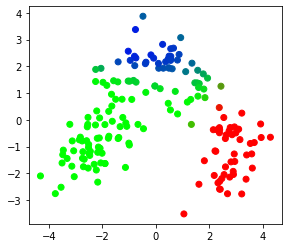

-----iteration--- 9


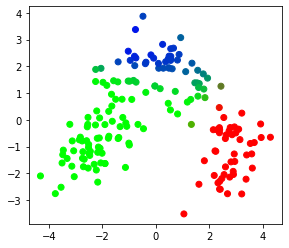

-----iteration--- 10


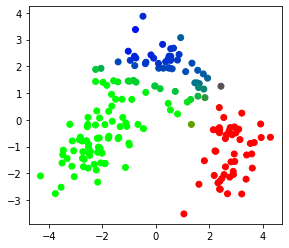

-----iteration--- 11


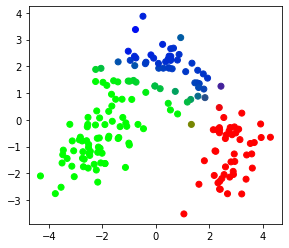

-----iteration--- 12


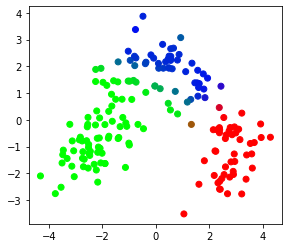

-----iteration--- 13


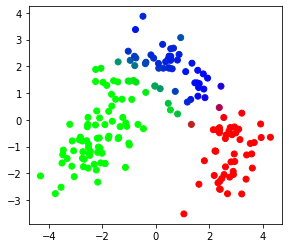

-----iteration--- 14


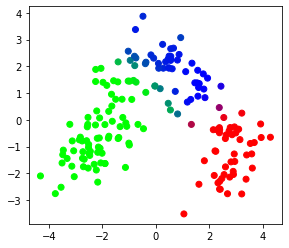

-----iteration--- 15


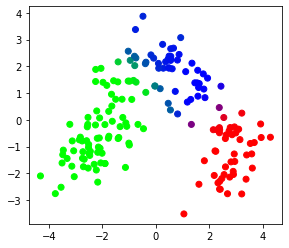

-----iteration--- 16


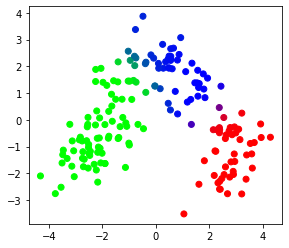

-----iteration--- 17


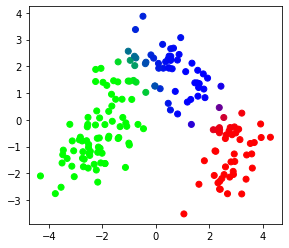

-----iteration--- 18


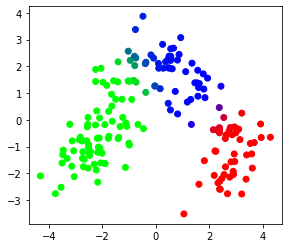

-----iteration--- 19


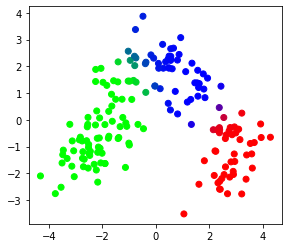

-----iteration--- 20


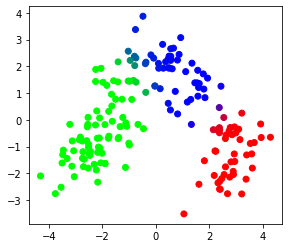

-----iteration--- 21


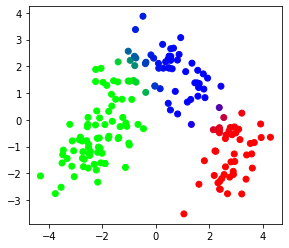

-----iteration--- 22


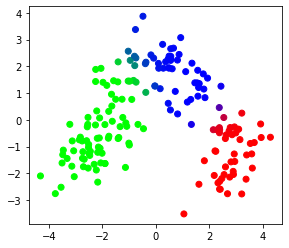

-----iteration--- 23


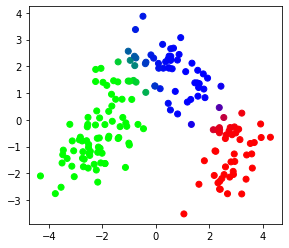

-----iteration--- 24


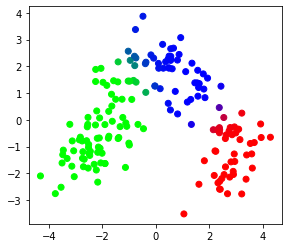

-----iteration--- 25


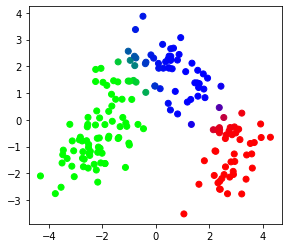

-----iteration--- 26


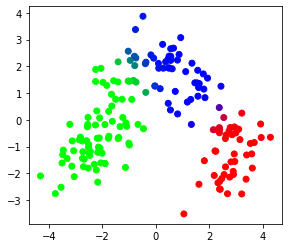

-----iteration--- 27


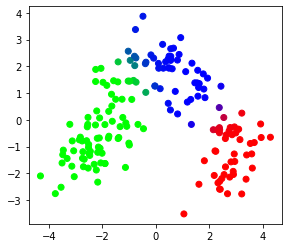

-----iteration--- 28


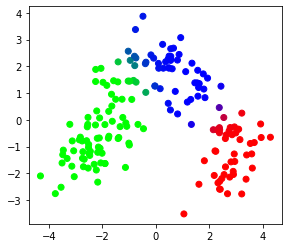

-----iteration--- 29


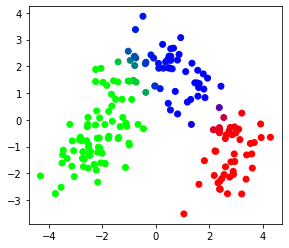

-----iteration--- 30


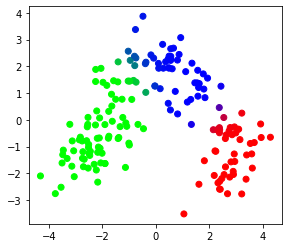

-----iteration--- 31


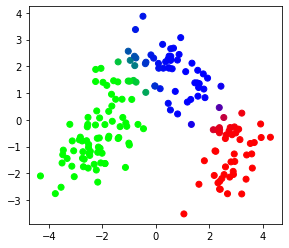

-----iteration--- 32


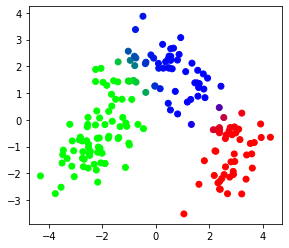

-----iteration--- 33


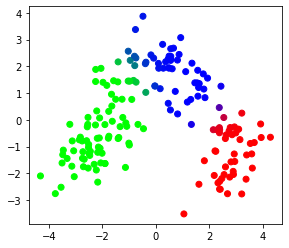

-----iteration--- 34


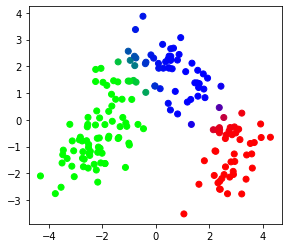

-----iteration--- 35


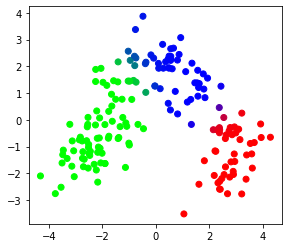

training coverged


In [2]:
import numpy as np
import numpy.matlib
import pandas as pd
from scipy.stats import multivariate_normal as mvn

import matplotlib.pyplot as plt
from sklearn import preprocessing
# import random


data = pd.read_csv('examples/module7_EM-GMM/wine.csv',header=None).to_numpy()
y = data[:,0]
data = data[:,1:]

ndata = preprocessing.scale(data)
m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m

# pca the data
d = 2  # reduced dimension
V,_,_ = np.linalg.svd(C)
V = V[:, :d]

# project the data to the top 2 principal directions
pdata = np.dot(ndata,V)
plt.scatter(pdata[np.where(y == 1),0],pdata[np.where(y == 1),1])
plt.scatter(pdata[np.where(y == 2),0],pdata[np.where(y == 2),1])
plt.scatter(pdata[np.where(y == 3),0],pdata[np.where(y == 3),1])
#plt.show()

# EM-GMM for wine data
# number of mixtures
K = 3

# random seed
seed = 4

# initialize prior
# np.random.seed(seed)
pi = np.random.random(K)
pi = pi/np.sum(pi)

# initial mean and covariance
# np.random.seed(seed)
mu = np.random.randn(K,2)
mu_old = mu.copy()

sigma = []
for ii in range(K):
    # to ensure the covariance psd
    # np.random.seed(seed)
    dummy = np.random.randn(2, 2)
    sigma.append(dummy@dummy.T)
    
# initialize the posterior
tau = np.full((m, K), fill_value=0.)

# # parameter for countour plot
# xrange = np.arange(-5, -5, 0.1)
# yrange = np.arange(-5, -5, 0.1)

# ####
maxIter= 100
tol = 1e-3

plt.ion()
    
for ii in range(100):

    # E-step    
    for kk in range(K):
        tau[:, kk] = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])
    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (m,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, K)))
    
    
    # M-step
    for kk in range(K):
        # update prior
        pi[kk] = np.sum(tau[:, kk])/m
        
        # update component mean
        mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        # update cov matrix
        dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
        
    print('-----iteration---',ii)    
    plt.scatter(pdata[:,0], pdata[:,1], c= tau)
    plt.axis('scaled')
    plt.draw()
    plt.pause(0.1)
    if np.linalg.norm(mu-mu_old) < tol:
        print('training coverged')
        break
    mu_old = mu.copy()
    if ii==99:
        print('max iteration reached')
        break

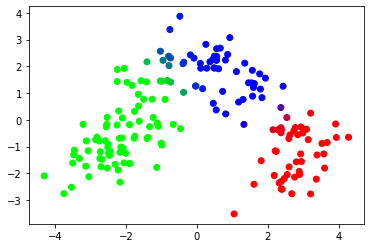

In [6]:
plt.scatter(pdata[:, 0], pdata[:, 1], c=tau)

In [3]:
tau.shape

(178, 3)

In [4]:
data.shape

(178, 13)

In [5]:
tau

array([[3.68061111e-24, 1.00000000e+00, 1.02071563e-16],
       [6.47973713e-20, 9.99998662e-01, 1.33753708e-06],
       [2.53095816e-19, 1.00000000e+00, 4.95221355e-12],
       [2.75978259e-25, 1.00000000e+00, 3.16506277e-25],
       [7.81132100e-10, 9.99995229e-01, 4.77007361e-06],
       [3.86856096e-21, 1.00000000e+00, 1.01458146e-18],
       [1.32969781e-18, 1.00000000e+00, 2.57588209e-12],
       [3.38553951e-15, 1.00000000e+00, 2.37507581e-12],
       [1.71981669e-19, 1.00000000e+00, 1.35428458e-11],
       [2.21941357e-21, 1.00000000e+00, 5.97312405e-12],
       [1.45488920e-25, 1.00000000e+00, 1.10128735e-16],
       [4.51805183e-15, 9.99999946e-01, 5.36204322e-08],
       [2.73151154e-17, 9.99999998e-01, 2.13810825e-09],
       [1.05849086e-25, 1.00000000e+00, 8.10682689e-16],
       [1.97989289e-30, 1.00000000e+00, 4.26819087e-24],
       [9.38848048e-17, 1.00000000e+00, 1.42656522e-13],
       [1.06602869e-14, 1.00000000e+00, 1.52038627e-15],
       [4.33519991e-14, 1.00000